In [117]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot
import pprint
from collections import Counter, OrderedDict

In [76]:
data = pd.read_hdf('/scratch/gjr286/BandhubDataset.h5', 'bandhub')

In [77]:
data.columns

Index(['trackId', 'songId', 'masterOwner', 'trackOwner', 'artist', 'title',
       'subTitle', 'views', 'instrument', 'contentTags', 'audioURL',
       'processedAudioURL', 'trackVideoURL', 'startTime', 'trackDuration',
       'audioSampleRate', 'fromYouTube', 'isFinished', 'isPublished',
       'hasPublishedTracks', 'mixedAudioURL', 'mixedVideoURL', 'musicBrainzID',
       'newMusicBrainzID', 'publicSongCollectionIndex', 'volume1', 'volume2',
       'mute1', 'mute2', 'solo1', 'solo2', 'compressorValue1',
       'compressorValue2', 'panValue1', 'panValue2', 'echoValue1',
       'echoValue2', 'noiseGateValue1', 'noiseGateValue2', 'reverbValue1',
       'reverbValue2', 'eqValue1', 'eqValue2'],
      dtype='object')

In [78]:
# distribution of multitracks
def multiTrackLens(dummyData):
    groupedData = dummyData.groupby("songId")
    groupedData = pubData.groupby("songId") # number of multitrack distributions
    multiTrackLens = []
    for name,group in groupedData:
        multiTrackLens.append(len(group))
    return multiTrackLens

In [79]:
# info for published tracks (currently downloaded)

In [101]:
#grab published tracks
pubData = data.loc[data.isPublished == True] #grab published tracks
multiTracks = multiTrackLens(pubData)
print('median', np.median(nonYouTubeMultiTracks))
stats.describe(multiTracks)

median 1.0


DescribeResult(nobs=130379, minmax=(1, 65), mean=2.2290092729657385, variance=8.333539716269533, skewness=3.3506788101598612, kurtosis=16.826845389271856)

Text(0,0.5,'Frequency')

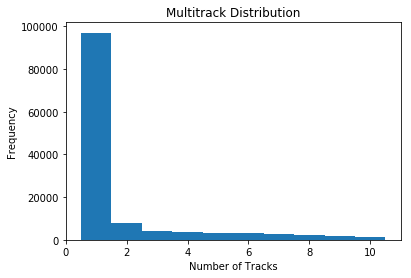

In [61]:
pyplot.hist(multiTracks,10, (0.5, 10.5))
pyplot.title("Multitrack Distribution")
pyplot.xlabel("Number of Tracks")
pyplot.ylabel("Frequency")

In [128]:
contentTagData = pubData.loc[pubData.contentTags != 'null']
len(contentTagData)
print(pd.unique(contentTagData.contentTags))
#To Do: unpack each dictionary, count, sort and plot like below

['["Pop", "British"]' '["American", "ClassicRock"]' '["American", "Pop"]'
 '["60s", "Beatles", "ClassicRock", "British"]'
 '["British", "Pop", "90s"]' '["RnB", "American", "60s"]'
 '["70s", "British", "ClassicRock"]'
 '["70s", "British", "ClassicRock", "HardRock"]' '[]'
 '["ClassicRock", "American", "70s"]'
 '["AlternativeRock", "American", "90s"]'
 '["Jazz", "OriginalMusic", "American"]' '["Latin", "WorldMusic"]'
 '["OriginalMusic", "RnB"]' '["OriginalMusic", "British"]'
 '["Argentinos"]' '["Indie", "American"]' '["HardRock", "British"]'
 '["OriginalMusic"]' '["Suomi", "Metal", "British"]'
 '["OriginalMusic", "RnB", "Canadians"]' '["Punk", "British", "80s"]'
 '["American", "Canadians", "AlternativeRock"]'
 '["AlternativeRock", "Funk", "American", "Canadians"]'
 '["Funk", "AlternativeRock", "Canadians", "American"]'
 '["RnB", "American"]' '["AlternativeRock", "American"]'
 '["90s", "AlternativeRock", "American"]'
 '["British", "Canadians", "Beatles", "ClassicRock", "70s"]'
 '["70s", "B

Number of Tracks with Instrument Labels 47645


Text(0,0.5,'Frequency')

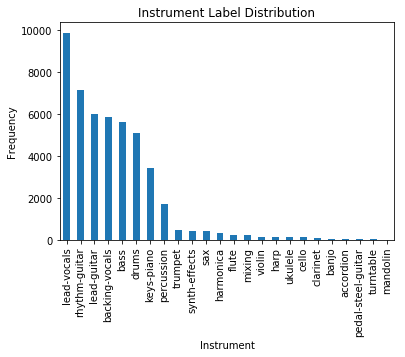

In [130]:
instrumentData = pubData.loc[pd.notnull(pubData.instrument)]
print('Number of Tracks with Instrument Labels:', len(instrumentData))
instrumentCounts = Counter(instrumentData.instrument)
instrumentCounts = OrderedDict(instrumentCounts.most_common())
df = pd.DataFrame.from_dict(instrumentCounts, orient='index')
ax = df.plot(kind='bar', title = 'Instrument Label Distribution', legend = False)
ax.set_xlabel("Instrument")
ax.set_ylabel("Frequency")

In [131]:
nonYouTubeData = pubData.loc[pubData.fromYouTube == False] #grab published tracks
youTubeData = pubData.loc[pubData.fromYouTube == True] #grab published tracks
print('Non-YouTube Tracks:', len(nonYouTubeData))
print('YouTube Tracks:', len(youTubeData))

Non-YouTube tracks: 167730
YouTube tracks: 122886


In [132]:
nonYouTubeMultiTracks = multiTrackLens(nonYouTubeData)
print('median', np.median(nonYouTubeMultiTracks))
stats.describe(nonYouTubeMultiTracks)

median 1.0
DescribeResult(nobs=130379, minmax=(1, 65), mean=2.2290092729657385, variance=8.333539716269533, skewness=3.3506788101598612, kurtosis=16.826845389271856)


Text(0,0.5,'Frequency')

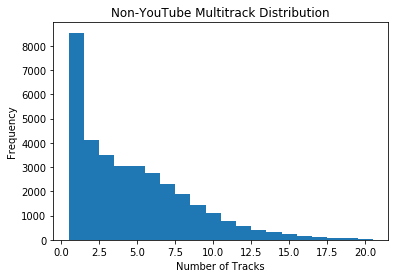

In [67]:
pyplot.hist(nonYouTubeMultiTracks,20, (0.5, 20.5))
pyplot.title("Non-YouTube Multitrack Distribution")
pyplot.xlabel("Number of Tracks")
pyplot.ylabel("Frequency")

In [ ]:
# To Do : content tags and duration
# repeat for all tracks...

In [ ]:
# info for all tracks